# 2.4.2: World Population (Symbolic Tools)

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

In this notebook, we'll introduce some thoughts about the complementary roles of mathematical analysis and simulation, as well as some tools we can use to solve problems analytically.

## Analysis and Simulation

Once you have designed a model (i.e. completed the investigation and abstraction steps), there are generally two ways to proceed with implementation: simulation and analysis. Simulation often comes in the form of a computer program. Analysis often comes in the form of algebra and calculus; that is, symbolic manipulation using mathematical notation.

<br>

Analysis and simulation have different capabilities and limitations.
Simulation is generally more versatile; it is easy to add and remove parts of a program and test many versions of a model, as we have done in the previous examples.  Simulation can also more effectively address complex physical situations.

<br>

But there are several things we can do with analysis that are harder or impossible with simulations:

*   With analysis we can sometimes compute, exactly and efficiently, a value that we could only approximate, less efficiently, with
    simulation. For example, in the quadratic model we plotted net growth versus population and saw it crosses through zero when the population is
    near 14 billion.  We could estimate the crossing point using a
    numerical search algorithm (more about that later). But with a bit of algebra, we derived the general result that $K=-\alpha/\beta$.
    

*   Analysis sometimes provides "computational shortcuts", that is, the
    ability to jump forward in time to compute the state of a system
    many time steps in the future without computing the intervening
    states.
    

*  We can use analysis to state and prove generalizations about models;
    for example, we might prove that certain results will always or
    never occur. With simulations, we can show examples and sometimes
    find counterexamples, but it is hard to write proofs.


*  Analysis can provide insight into models and the systems they
    describe; for example, sometimes we can identify regimes of
    qualitatively different behavior and key parameters that control
    those behaviors.

### Analysis with WolframAlpha

Until recently, most analysis was done, as they say, by rubbing graphite on wood
pulp, a process that is laborious and error-prone. A useful
alternative is symbolic computation. If you have used services like
WolframAlpha, you have used symbolic computation.

<br>

For example, if go to <https://www.wolframalpha.com/> and enter

```
df(t) / dt = alpha f(t)
```

WolframAlpha infers that `f(t)` is a function of `t` and `alpha` is a
parameter; it classifies the query as a "first-order linear ordinary
differential equation", and reports the general solution:

$$f(t) = c_1 e^{\alpha t}$$ 

If you add a second equation to specify the initial condition:

```
df(t) / dt = alpha f(t),  f(0) = p_0
```

WolframAlpha reports the particular solution:

$$f(t) = p_0 \exp(\alpha t)$$

WolframAlpha is based on Mathematica, a powerful programming language
designed specifically for symbolic computation.

### Analysis with SymPy

Python has a library called SymPy that provides symbolic computation
tools similar to Mathematica. They are not as easy to use as
WolframAlpha, but they have some other advantages.  To use it, we'll define `Symbol` objects that represent variable names and functions.
The `symbols` function takes a string and returns `Symbol` objects.
So if we run this assignment:

In [1]:
from sympy import symbols

t = symbols('t')

Now when we use `t`, Python understands that it is a symbol, not a numerical value. For example, if we use `t` as part of an expression, like this, it returns the new expression rather than an "answer":

In [2]:
expr = t + 1
expr

t + 1

Python doesn't try to perform numerical addition; rather, it creates a
new `Symbol` that represents the sum of `t` and `1`. We can evaluate the
sum using `subs`, which substitutes a value for a symbol. This example
substitutes 2 for `t`:

In [3]:
expr.subs(t, 2)

3

Functions in SymPy are represented by a special kind of `Symbol`:

In [4]:
from sympy import Function

f = Function('f')
f

f

Now if we write `f(t)`, we get an object that represents the evaluation of a function, $f$, at a value, $t$. 

In [5]:
f(t)

f(t)

But again SymPy doesn't actually
try to evaluate it.

### Differential Equations In SymPy

SymPy provides a function, `diff`, that can differentiate a function. We can apply it to `f(t)` like this:

In [6]:
from sympy import diff

dfdt = diff(f(t), t)
dfdt

Derivative(f(t), t)

The result is a `Symbol` that represents the derivative of `f` with
respect to `t`. But again, SymPy doesn't try to compute the derivative
yet.  To represent a differential equation, we use `Eq`:

In [7]:
from sympy import Eq

alpha = symbols('alpha')
eq1 = Eq(dfdt, alpha*f(t))
eq1

Eq(Derivative(f(t), t), alpha*f(t))

The result is an object that represents an equation.  Now
we can use `dsolve` to solve this differential equation:

In [8]:
from sympy import dsolve

solution_eq = dsolve(eq1)
solution_eq

Eq(f(t), C1*exp(alpha*t))

The result is the *general
solution*, which still contains an unspecified constant, $C_1$. To get the *particular solution* where $f(0) = p_0$, we substitute `p_0` for `C1`. First, we have to create two more symbols:

In [9]:
C1, p_0 = symbols('C1 p_0')

Now we can perform the substitution:

In [10]:
particular = solution_eq.subs(C1, p_0)
particular

Eq(f(t), p_0*exp(alpha*t))

This particular solution tells us that when $t =0$, the population is the initial population $p_0$.  You can test that by setting $t=0$ on the right side of the equation: in this case, $e^{\alpha t}$ is $1$, so $f(t)$ is $p_0$, which is what we wanted.

### Solving the Quadratic Growth Model

To solve the quadratic growth curve, we'll use the `r, K` parameterization.  Recall that it is of this form:

$$x_{n+1} = x_n + r x_n (1 - x_n / K)$$ 

Before we go on, take a look at the equation.   We can always assume that $x_n$ is positive.  Why?

What happens when $r$ is positive?  negative?

In order to solve this, we'll need two more symbols:

In [11]:
r, K = symbols('r K')

Now we can write the differential equation.

In [12]:
eq2 = Eq(diff(f(t), t), r * f(t) * (1 - f(t)/K))
eq2

Eq(Derivative(f(t), t), r*(1 - f(t)/K)*f(t))

And solve it.

In [13]:
solution_eq = dsolve(eq2)
solution_eq

Eq(f(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

This is the general solution to the quadratic model.   Again, this means that any function $f(t)$ of this form, when subbed into the different equation `eq2`, will result in a true statement.  The result, `solution_eq`, contains `rhs`, which is the right-hand side of the solution.

In [14]:
general = solution_eq.rhs
general

K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1)

We can evaluate the right-hand side at $t=0$

In [15]:
at_0 = general.subs(t, 0)
at_0

K*exp(C1*K)/(exp(C1*K) - 1)

Now we want to find the value of `C1` that makes `f(0) = p_0`.  So we'll create the equation `at_0 = p_0` and solve for `C1`.  Because this is just an algebraic identity, not a differential equation, we use `solve`, not `dsolve`.

In [16]:
from sympy import solve

solutions = solve(Eq(at_0, p_0), C1)

The result from `solve` is a list of solutions.  

In [17]:
type(solutions), len(solutions)

(list, 1)

In this case, there is only one solution, but we still get a list, so we have to use the bracket operator, `[0]`, to select the first one.

In [18]:
value_of_C1 = solutions[0]
value_of_C1

log(-p_0/(K - p_0))/K

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

In [19]:
particular = general.subs(C1, value_of_C1)
particular

-K*p_0*exp(r*t)/((K - p_0)*(-p_0*exp(r*t)/(K - p_0) - 1))

The result is complicated, but SymPy provides a function that tries to simplify it.

In [20]:
simpler = particular.simplify()
simpler

K*p_0*exp(r*t)/(K + p_0*exp(r*t) - p_0)

This function is called the *logistic growth curve*; see
<http://modsimpy.com/logistic>. In the context of growth models, the
logistic function is often written like this:

$$f(t) = \frac{K}{1 + A \exp(-rt)}$$ 

where $A = (K - p_0) / p_0$.

If you use SymPy to compute an expression, and then want to evaluate that expression in Python, SumPy provides a function called `pycode` that generates Python code:

In [21]:
from sympy.printing.pycode import pycode

pycode(simpler)

'K*p_0*math.exp(r*t)/(K + p_0*math.exp(r*t) - p_0)'

Remember what we have done here:
* We started with a quadratic growth function that said that the population increase each year was defined as $\Delta p = \alpha x + \beta x^2$
* We put this into $r-K$ form, which gave us $\Delta p = r x_n (1 - x_n / K)$
* We put that change function in continuous DEQ form, which defines the instantaneous rate of change as $df(t)/dt =r f(t) (1 - f(t) / K)$.
* We used SymPy to solve this DEQ, and this solution is printed in the cell above.  This solution $f(t)$ says: the rate of change of this function $f(t)$ is always equal to the right hand side of the DEQ in the line above.

<br>

Now to double-check, we should be able to just plot our solution function and get the same curve that we found in earlier notebooks by using a change function and time steps:

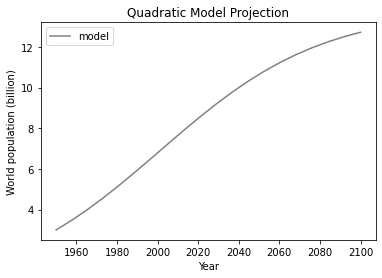

In [34]:
from numpy import linspace
import math
import pandas as pd

p_0 = 3
K = 13.8
t_array = linspace(1950,2100,20)
r = 0.025
pop_array = pd.Series([],dtype=object)
for t in t_array:
    pop_array[t] = K*p_0*math.exp(r*(t-1950))/(K + p_0*math.exp(r*(t-1950)) - p_0)
pop_array.plot(color='gray', label='model',xlabel='Year', 
         ylabel='World population (billion)',
         title='Quadratic Model Projection',
            legend=True);


---

## Summary

In this notebook we used WolframAlpha and SymPy to solve differential equations.  In the previous notebook, we identified the *linear* and *exponential* growth models.  The quadratic growth model is called *logistic growth* because the solution is a logistic function:

$$f(t) = \frac{K}{1 + A \exp(-rt)}$$ 

where $A = (K - p_0) / p_0$.

<br>

With that, we are done modeling world population growth.
The next notebook presents case studies where you can apply the tools we have learned so far.

<br>

---



## Exercises

### Exercise 1

 Use SymPy to solve the quadratic growth equation using the alternative parameterization

$$ \frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $$


In [23]:
# Import sympy functions, create function and create symbols
from sympy import symbols,dsolve,solve,Function,Eq,diff

t,alpha,beta,p_0 = symbols('t alpha beta p_0')
f = Function('f')


In [24]:
# Create the equation
eq3 = Eq(diff(f(t),t),alpha*f(t)+beta*(f(t))**2)
eq3

Eq(Derivative(f(t), t), alpha*f(t) + beta*f(t)**2)

In [25]:
# Solve for the general equation
sol_gen = dsolve(eq3)
sol_gen_rhs = sol_gen.rhs
sol_gen_rhs

alpha*exp(alpha*(C1 + t))/(beta*(1 - exp(alpha*(C1 + t))))

In [26]:
# Find the form of this equation when t = 0
rhs_at_0 = sol_gen_rhs.subs(t,0)
rhs_at_0

alpha*exp(C1*alpha)/(beta*(1 - exp(C1*alpha)))

In [27]:
# Now solve for C1 when f(0) is equal to
# the initial population p_0.  Find the value of C1
C1 = symbols('C1')
solutions = solve(Eq(rhs_at_0,p_0),C1)
val_of_C1 = solutions[0]
val_of_C1



log(beta*p_0/(alpha + beta*p_0))/alpha

In [28]:
# Put the particular value of C1 back into the general
# equation and simplify.  Your solution should have a form
# similar to the r,K solution in the notebook (not exactly, of course)
part_sol = sol_gen.subs(C1,val_of_C1)
part_sol_simp = part_sol.simplify()
part_sol_simp

Eq(f(t), alpha*p_0*exp(alpha*t)/(alpha - beta*p_0*exp(alpha*t) + beta*p_0))

In [29]:
# Put the solution in a form usable with standard Python code
from sympy.printing.pycode import pycode

pycode(part_sol_simp.rhs)

'alpha*p_0*math.exp(alpha*t)/(alpha - beta*p_0*math.exp(alpha*t) + beta*p_0)'

Now plot this expression to make sure the shape matches the shape of the plot in the $r-K$ form.   Note that in notebook 1.3.4 we defined $\alpha = 0.025$ and $\beta = -0.0018$.  Be sure to adjust the solution equation so that $t$ starts at 1950, just as we did when plotting the $r-K$ version above.

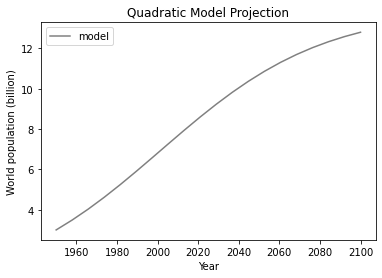

In [36]:
p_0 = 3
t_array = linspace(1950,2100,20)
alpha = 0.025
beta = -0.0018
pop_array = pd.Series([],dtype=object)
for t in t_array:
    pop_array[t] = alpha*p_0*math.exp(alpha*(t-1950))/(alpha - beta*p_0*math.exp(alpha*(t-1950)) + beta*p_0)
pop_array.plot(color='gray', label='model',xlabel='Year', 
         ylabel='World population (billion)',
         title='Quadratic Model Projection',
            legend=True);

### Exercise 2

  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using alpha/ beta parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

Find the general solution and also the particular solution where `f(0) = p_0`.

Confirm that the solution you found in exercise 1 is the same as the one produced by WolframAlpha(No need to put anything into a this exercise: just make sure you see how to use WolframAlpha to get a similar result)